In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random as rd

## Q-voter model implementation

In [24]:
def q_voter_MC_step(network : nx.classes.graph.Graph,states : dict,q : int,p : float) -> dict:
    
    agents = list(network.nodes())
    opinions = np.array(list(states.values()))
    N = len(agents)
    
    for i in range(N):
        S = rd.choice(agents)
        if rd.random() < p:
            if rd.random() < 0.5:
                states[S] *= -1 
        else:
            neighbors = list(network.neighbors(S))
            if len(neighbors) >= q:
                selected_neighbors = rd.sample(neighbors,q)
                if (np.sum(opinions[selected_neighbors])) == -q or (np.sum(opinions[selected_neighbors]) == q):
                    states[S] *= -1
    return states

def q_voter_simulation(network : nx.classes.graph.Graph,states : dict,q : int,p : float,N : int) -> list:
    
    n = nodes_number
    hist = np.zeros((N + 1,n))
    hist[0] = list(states.values())
    for i in range(N):
        state = hist[i]
        new_state = q_voter_MC_step(network,states,q,p)
        hist[i + 1] = list(new_state.values())
    return hist
    
def magnetization(state : dict) -> float:
    N = len(opinions)
    try:
        return np.mean(state,axis = 1)
    except:
        return np.mean(state)


### Complete graph

In [8]:
N = 1000 #Monte Carlo steps
nodes_number = 100
complete_graph = nx.complete_graph(nodes_number)
#q = 3 case
q = 3
hist_q = []
probs = np.arange(0,0.5,0.02)
for p in probs:
    print(p)
    agents = list(complete_graph.nodes())
    opinions = np.zeros(len(agents),dtype = int) + 1
    states = {agent:opinion for (agent,opinion) in zip(agents,opinions)}
    hist_q.append(q_voter_simulation(complete_graph,states,q,p,N))

0.0
0.02
0.04
0.06
0.08
0.1
0.12
0.14
0.16
0.18
0.2
0.22
0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48


In [9]:
q = 4
hist_q2 = []
for p in probs:
    print(p)
    hist_q2.append(q_voter_simulation(complete_graph,states,q,p,N))

0.0
0.02
0.04
0.06
0.08
0.1
0.12
0.14
0.16
0.18
0.2
0.22
0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48


In [12]:
m1 = np.zeros((len(probs) , N + 1))
m2 = np.zeros((len(probs) , N + 1))
for i in range(len(hist_q)):
    
    m1[i] = magnetization(hist_q[i])
    m2[i] = magnetization(hist_q2[i])

In [26]:
l = N//nodes_number + 1
averaged1 = np.zeros((len(probs) , l))
averaged2 = np.zeros((len(probs) , l))
for i in range(len(m1)):
    f1 = np.zeros(l)
    f2 = np.zeros(l)
    for j in range(l - 1):
        f1[j] = magnetization(m1[i][nodes_number * j:nodes_number * (j + 1)])
        f2[j] = magnetization(m2[i][nodes_number * j:nodes_number * (j + 1)])
    averaged1[i] = f1
    averaged2[i] = f2

## Plot the averaged magnetization over 100 independent runs

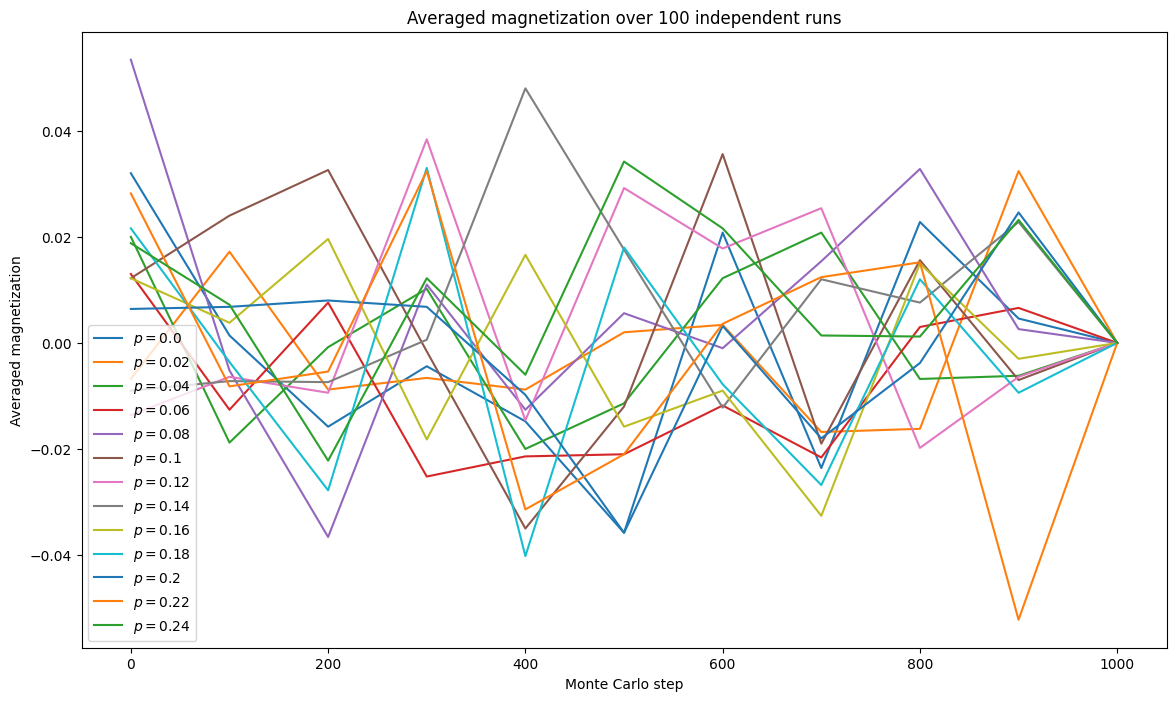

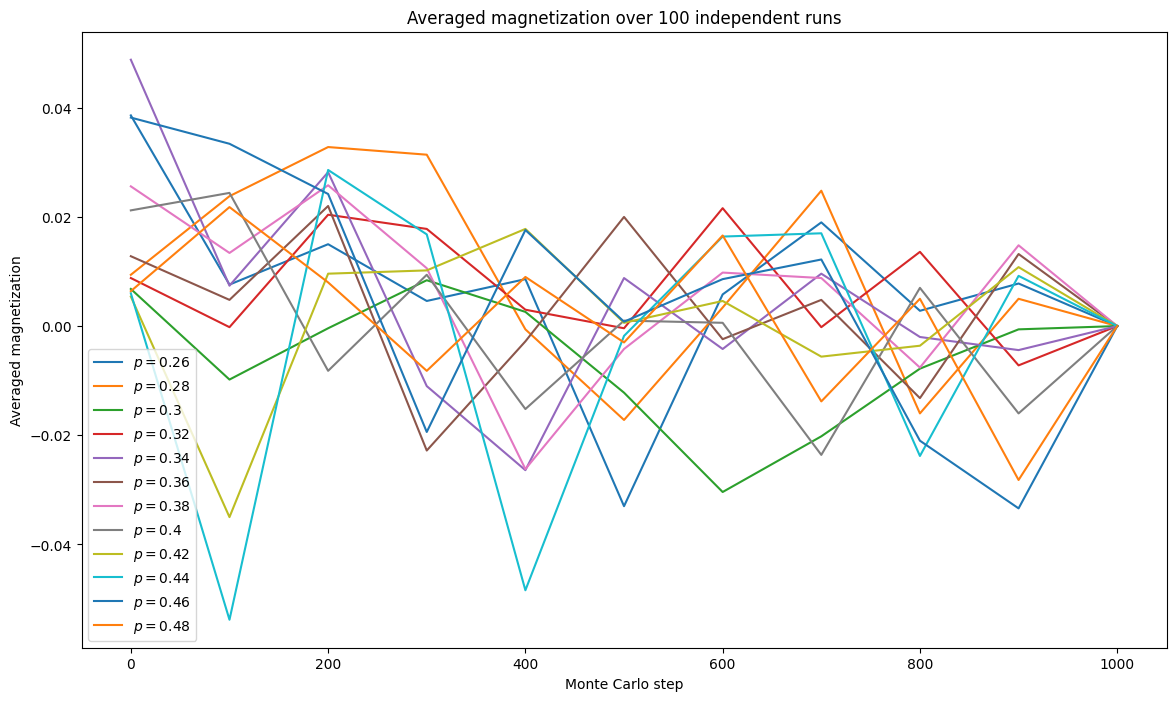

In [30]:
t = np.arange(0,N + 1,nodes_number)
plt.figure(figsize = (14,8))
for i in range(len(probs)):
    if i == len(probs) // 2 + 1:
        plt.show()
        plt.figure(figsize = (14,8))
    plt.title('Averaged magnetization over 100 independent runs')
    plt.xlabel('Monte Carlo step')
    plt.ylabel('Averaged magnetization')
    plt.plot(t,averaged1[i], label = f'$p = {probs[i]}$')
    plt.legend()
plt.show()

## Barabasi Albert graph - BA(100,4)

In [31]:
bar_alb = nx.barabasi_albert_graph(nodes_number,4)
q = 3
hist_q3 = []
probs = np.arange(0,0.5,0.02)
for p in probs:
    print(p)
    agents = list(bar_alb.nodes())
    opinions = np.zeros(len(agents),dtype = int) + 1
    states = {agent:opinion for (agent,opinion) in zip(agents,opinions)}
    hist_q3.append(q_voter_simulation(bar_alb,states,q,p,N))

0.0
0.02
0.04
0.06
0.08
0.1
0.12
0.14
0.16
0.18
0.2
0.22
0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48


In [32]:
q = 4
hist_q4 = []
for p in probs:
    print(p)
    hist_q4.append(q_voter_simulation(complete_graph,states,q,p,N))

0.0
0.02
0.04
0.06
0.08
0.1
0.12
0.14
0.16
0.18
0.2
0.22
0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48


In [35]:
m3 = np.zeros((len(probs) , N + 1))
m4 = np.zeros((len(probs) , N + 1))
for i in range(len(hist_q)):
    
    m3[i] = magnetization(hist_q3[i])
    m4[i] = magnetization(hist_q4[i])

In [36]:
l = N//nodes_number + 1
averaged3 = np.zeros((len(probs) , l))
averaged4 = np.zeros((len(probs) , l))
for i in range(len(m3)):
    f1 = np.zeros(l)
    f2 = np.zeros(l)
    for j in range(l - 1):
        f1[j] = magnetization(m3[i][nodes_number * j:nodes_number * (j + 1)])
        f2[j] = magnetization(m4[i][nodes_number * j:nodes_number * (j + 1)])
    averaged3[i] = f1
    averaged4[i] = f2

## Plot the averaged magnetization over 100 independent runs

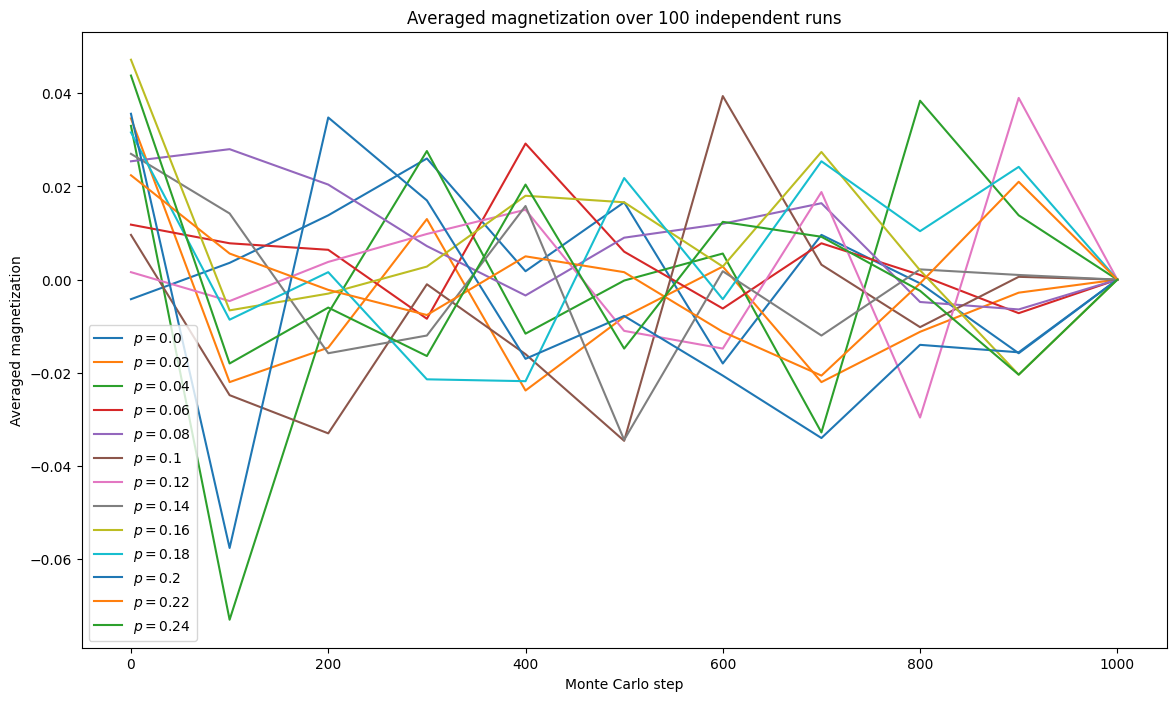

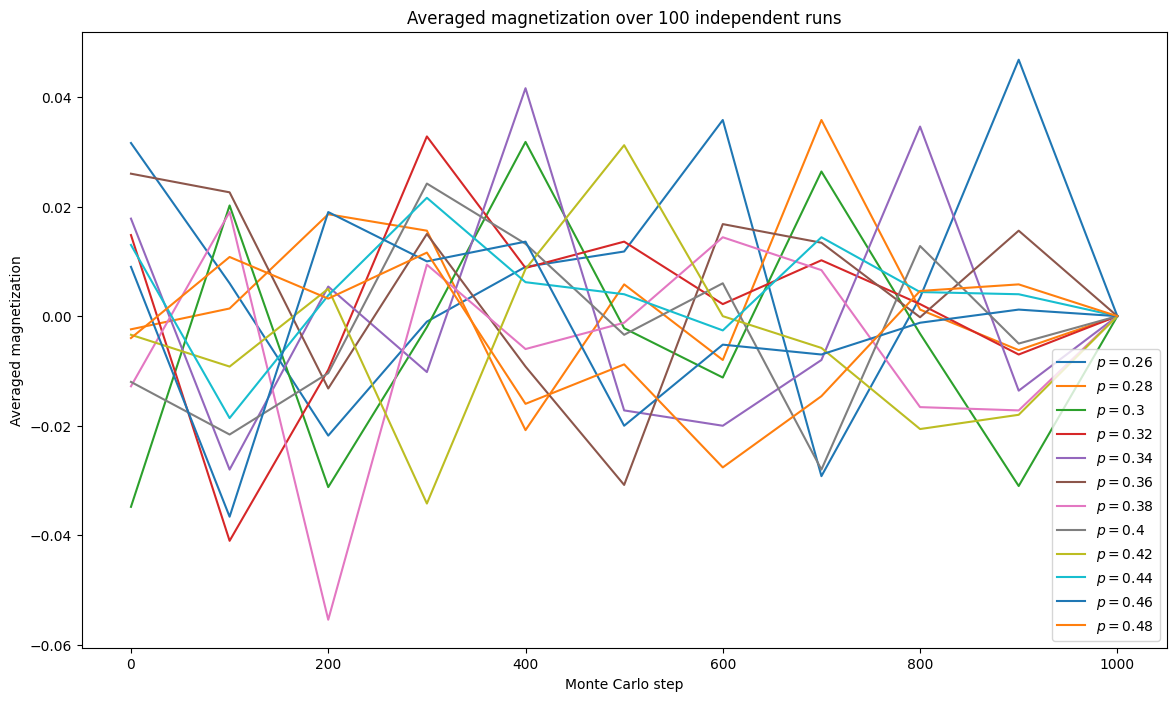

In [49]:
t = np.arange(0,N + 1,nodes_number)
plt.figure(figsize = (14,8))
for i in range(len(probs)):
    if i == len(probs) // 2 + 1:
        plt.show()
        plt.figure(figsize = (14,8))
    plt.title('Averaged magnetization over 100 independent runs')
    plt.xlabel('Monte Carlo step')
    plt.ylabel('Averaged magnetization')
    plt.plot(t,averaged3[i], label = f'$p = {probs[i]}$')
    plt.legend()
plt.show()

## Watts - Strogatz - WS(100,4,0.01)

In [39]:
wat_str1 = nx.watts_strogatz_graph(nodes_number,4,0.01)
q = 3
hist_q5 = []
probs = np.arange(0,0.5,0.02)
for p in probs:
    print(p)
    agents = list(wat_str1.nodes())
    opinions = np.zeros(len(agents),dtype = int) + 1
    states = {agent:opinion for (agent,opinion) in zip(agents,opinions)}
    hist_q5.append(q_voter_simulation(wat_str1,states,q,p,N))

0.0
0.02
0.04
0.06
0.08
0.1
0.12
0.14
0.16
0.18
0.2
0.22
0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48


In [48]:
q = 4
hist_q6 = []
for p in probs:
    print(p)
    hist_q6.append(q_voter_simulation(wat_str1,states,q,p,N))

0.0
0.02
0.04
0.06
0.08
0.1
0.12
0.14
0.16
0.18
0.2
0.22
0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48


In [41]:
m5 = np.zeros((len(probs) , N + 1))
m6 = np.zeros((len(probs) , N + 1))
for i in range(len(hist_q)):
    
    m5[i] = magnetization(hist_q5[i])
    m6[i] = magnetization(hist_q6[i])

In [42]:
l = N//nodes_number + 1
averaged5 = np.zeros((len(probs) , l))
averaged6 = np.zeros((len(probs) , l))
for i in range(len(m3)):
    f1 = np.zeros(l)
    f2 = np.zeros(l)
    for j in range(l - 1):
        f1[j] = magnetization(m5[i][nodes_number * j:nodes_number * (j + 1)])
        f2[j] = magnetization(m6[i][nodes_number * j:nodes_number * (j + 1)])
    averaged5[i] = f1
    averaged6[i] = f2

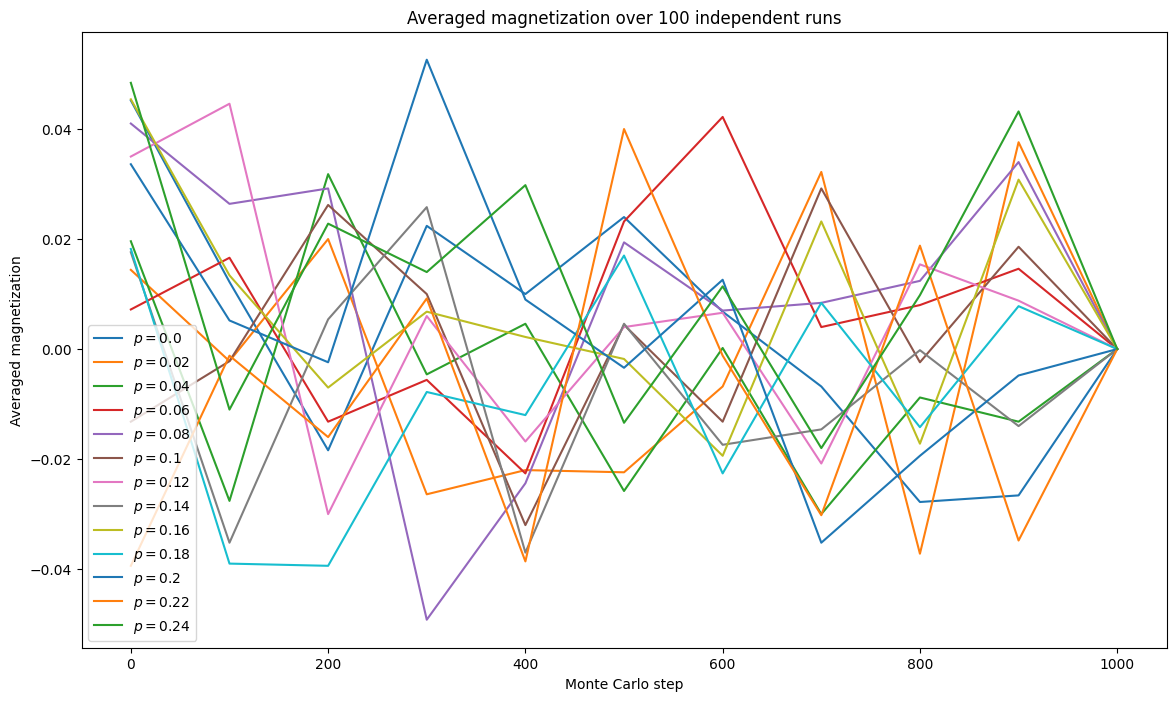

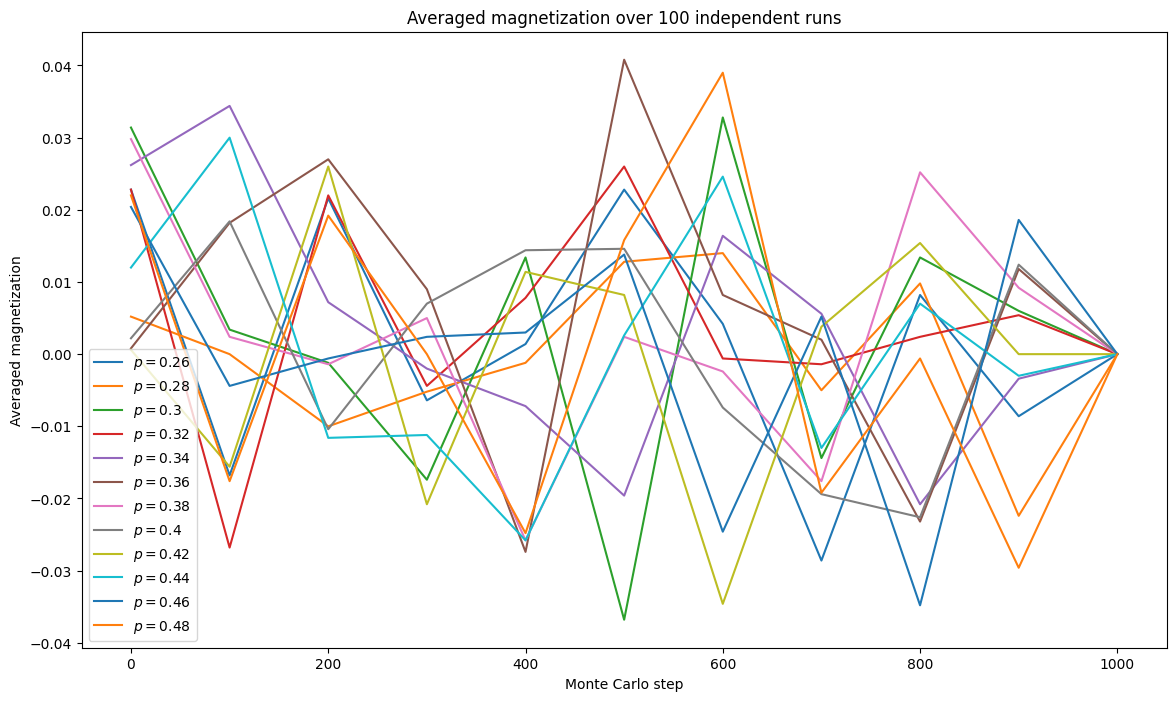

In [50]:
t = np.arange(0,N + 1,nodes_number)
plt.figure(figsize = (14,8))
for i in range(len(probs)):
    if i == len(probs) // 2 + 1:
        plt.show()
        plt.figure(figsize = (14,8))
    plt.title('Averaged magnetization over 100 independent runs')
    plt.xlabel('Monte Carlo step')
    plt.ylabel('Averaged magnetization')
    plt.plot(t,averaged5[i], label = f'$p = {probs[i]}$')
    plt.legend()
plt.show()

## Watts Strogatz - WS(100,4,0.2)

In [44]:
wat_str2 = nx.watts_strogatz_graph(nodes_number,4,0.2)
q = 3
hist_q7 = []
probs = np.arange(0,0.5,0.02)
for p in probs:
    print(p)
    agents = list(wat_str2.nodes())
    opinions = np.zeros(len(agents),dtype = int) + 1
    states = {agent:opinion for (agent,opinion) in zip(agents,opinions)}
    hist_q7.append(q_voter_simulation(wat_str2,states,q,p,N))

0.0
0.02
0.04
0.06
0.08
0.1
0.12
0.14
0.16
0.18
0.2
0.22
0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48


In [45]:
m7 = np.zeros((len(probs) , N + 1))
for i in range(len(hist_q)):
    m7[i] = magnetization(hist_q7[i])

In [46]:
l = N//nodes_number + 1
averaged7 = np.zeros((len(probs) , l))
for i in range(len(m3)):
    f1 = np.zeros(l)
    for j in range(l - 1):
        f1[j] = magnetization(m5[i][nodes_number * j:nodes_number * (j + 1)])
    averaged7[i] = f1

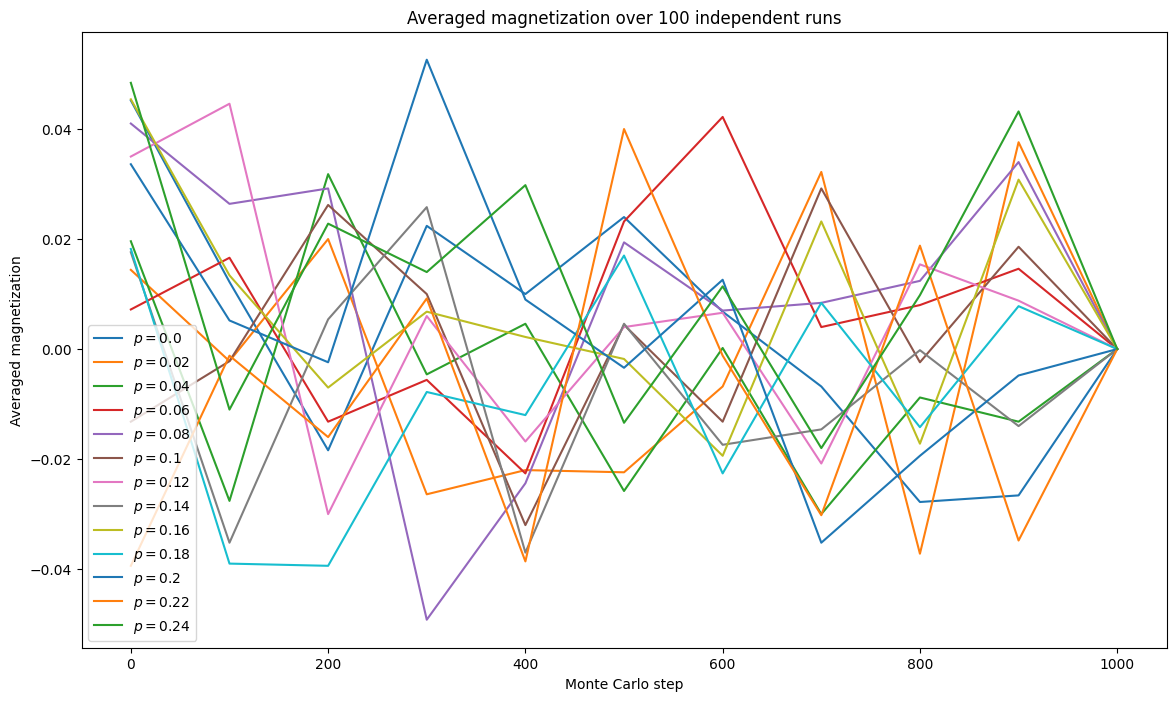

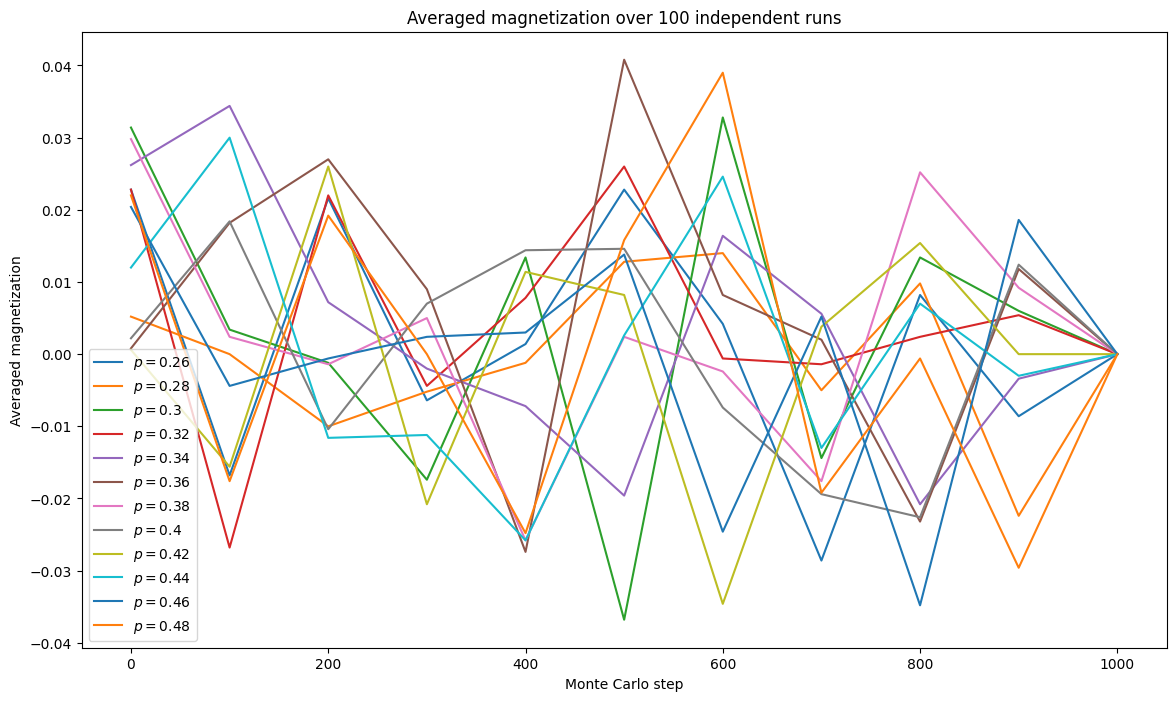

In [51]:
t = np.arange(0,N + 1,nodes_number)
plt.figure(figsize = (14,8))
for i in range(len(probs)):
    if i == len(probs) // 2 + 1:
        plt.show()
        plt.figure(figsize = (14,8))
    plt.title('Averaged magnetization over 100 independent runs')
    plt.xlabel('Monte Carlo step')
    plt.ylabel('Averaged magnetization')
    plt.plot(t,averaged7[i], label = f'$p = {probs[i]}$')
    plt.legend()
plt.show()

## Plot the time evolution of the magnetization for the  WS(100,4,0.01) network (averaged and for the single run) 

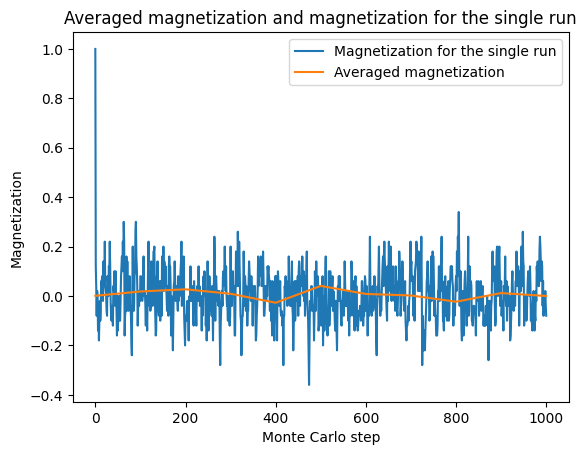

In [55]:
t = np.arange(0,N + 1,nodes_number)
T = np.arange(N + 1)
i = 18
plt.title('Averaged magnetization and magnetization for the single run')
plt.xlabel('Monte Carlo step')
plt.ylabel('Magnetization')
plt.plot(T,m1[i],label = 'Magnetization for the single run')
plt.plot(t,averaged7[i], label = 'Averaged magnetization')
plt.legend()
plt.show()